<a href="https://colab.research.google.com/github/samarthagawade/Exploratory-Data-Analysis-on-Netflix-Dataset/blob/main/Netflix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


**There is no null values**


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [ ]:
df["duration_value"] = df["duration"].str.extract(r'(\d+)').astype(float)
df["duration_unit"] = df["duration"].str.extract(r'([a-zA-Z]+)')

In [ ]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90.0,min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.0,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1.0,Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91.0,min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125.0,min


In [ ]:
#split the listed_in column
df['genre'] = df['listed_in'].str.split(', ')

In [ ]:
df['genre']

,genre
0,[Documentaries]
1,"[Crime TV Shows, International TV Shows, TV Ac..."
2,"[TV Dramas, TV Horror, TV Mysteries]"
3,"[Children & Family Movies, Comedies]"
4,"[Dramas, Independent Movies, International Mov..."
...,...
8785,"[International TV Shows, TV Dramas]"
8786,[Kids' TV]
8787,"[International TV Shows, Romantic TV Shows, TV..."
8788,[Kids' TV]


In [ ]:
genres=df['genre'].explode().value_counts().head(10)
genres

,count
genre,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1349
Documentaries,869
Action & Adventure,859
TV Dramas,762
Independent Movies,756
Children & Family Movies,641


***Content Type Distribution (Movies vs. TV Shows)***

In [ ]:
type_counts = df['type'].value_counts()

In [ ]:
type_counts

,count
type,
Movie,6126
TV Show,2664


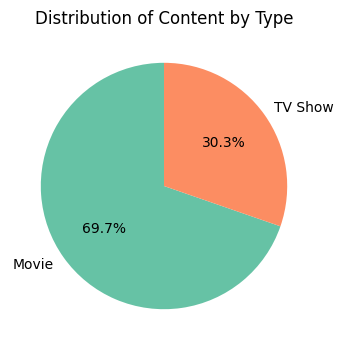

In [ ]:
 plt.figure(figsize=(6,4))
 plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
 plt.title('Distribution of Content by Type')
 plt.show()

***Content Added Over Time***

In [ ]:
#extract year and month from date
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

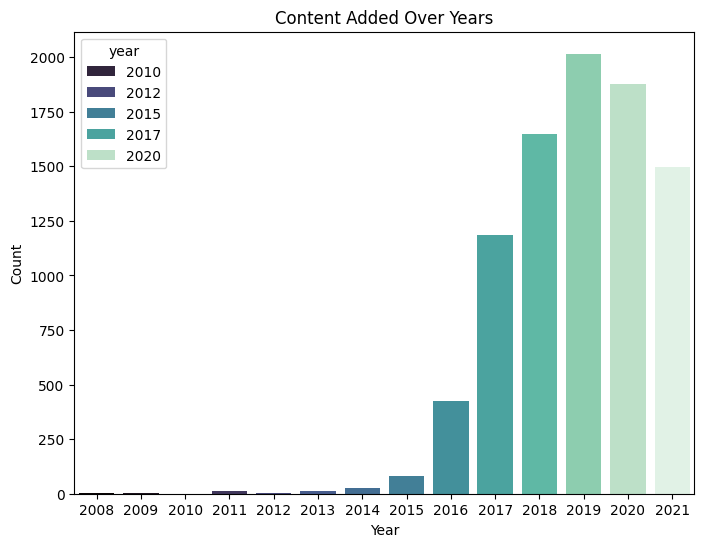

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='year',data=df,palette='mako',hue='year')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
#plot line chart of movies and tv shows over months
movies=df[df['type']=='Movie']['month'].value_counts().sort_index()
tv_shows=df[df['type']=='TV Show']['month'].value_counts().sort_index()

***Monthly Contribution of Movies and TV Shows***

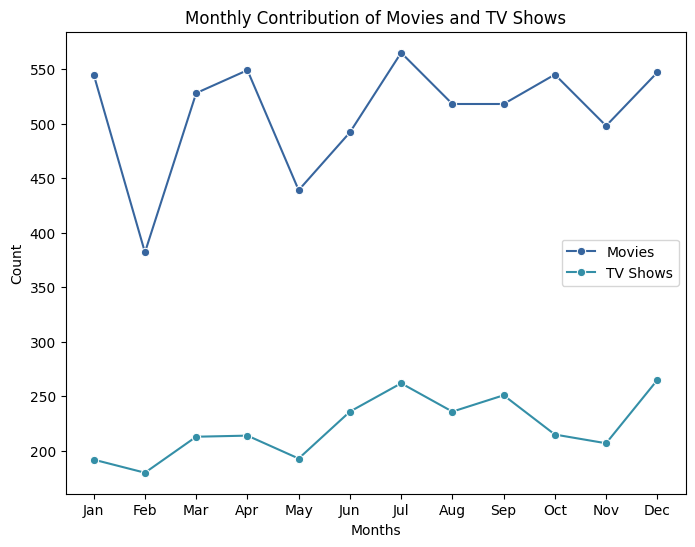

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=movies.index,y=movies.values,label='Movies',marker='o',color=sns.color_palette("mako")[2])
sns.lineplot(x=tv_shows.index,y=tv_shows.values,label='TV Shows',marker='o',color=sns.color_palette("mako")[3])
plt.title('Monthly Contribution of Movies and TV Shows')
plt.xlabel('Months')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Count')
plt.legend()
plt.show()

***Yearly Contribution of Movies and TV Shows***

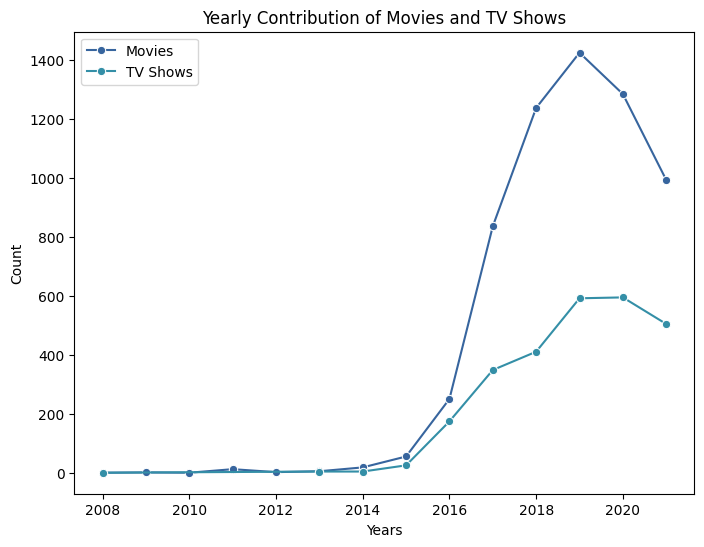

In [ ]:
yearly_movies=df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_tv_shows=df[df['type']=='TV Show']['year'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.lineplot(x=yearly_movies.index,y=yearly_movies.values,label='Movies',marker='o',color=sns.color_palette("mako")[2])
sns.lineplot(x=yearly_tv_shows.index,y=yearly_tv_shows.values,label='TV Shows',marker='o',color=sns.color_palette("mako")[3])
plt.title('Yearly Contribution of Movies and TV Shows')
plt.xlabel('Years')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
country=df['country'].value_counts().head(10)

In [ ]:
country

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


***country wise distribution***

Text(0, 0.5, 'Count')

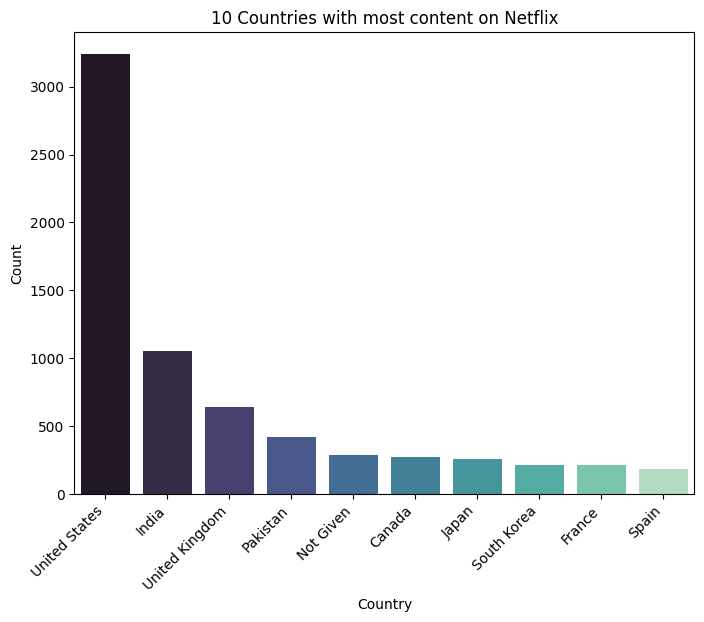

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=country.index,y=country.values,palette='mako',hue=country.index)
plt.xticks(rotation=45, ha='right')
plt.title('10 Countries with most content on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')


***Top 10 Genres***

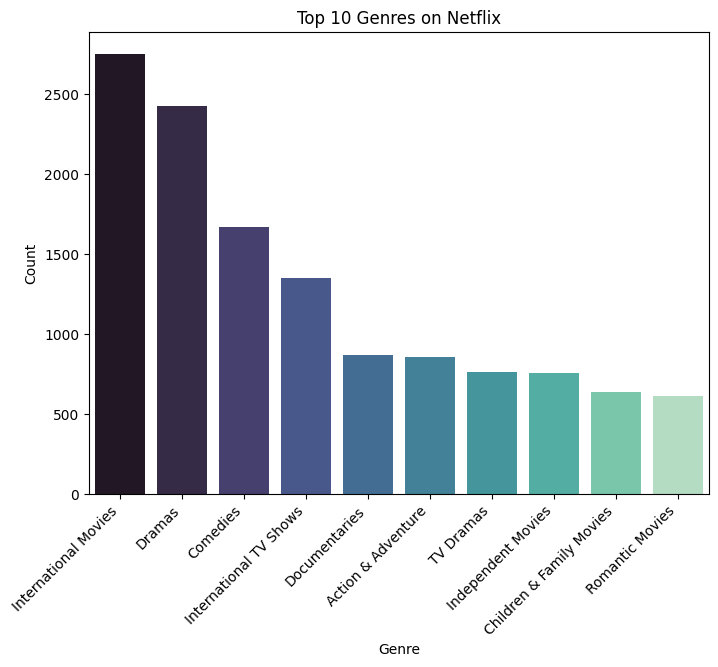

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=genres.index,y=genres.values,palette='mako',hue=genres.index)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


In [ ]:
rating=df['rating'].value_counts()
rating

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


***Rating Frequeny***

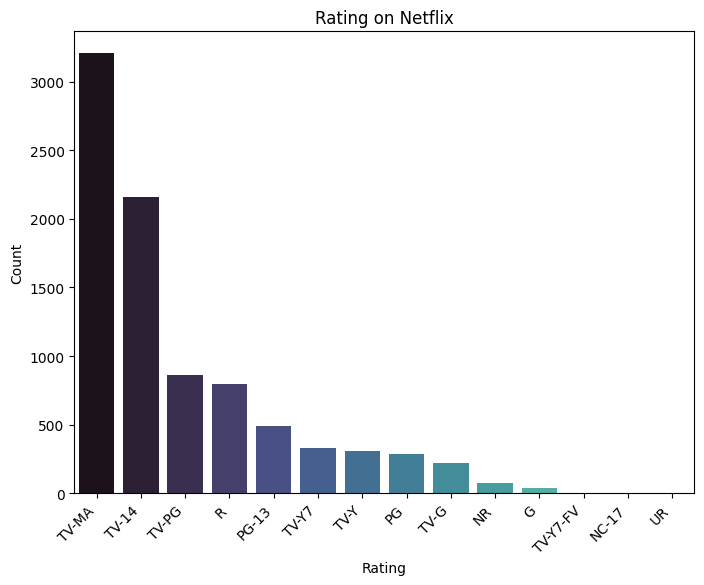

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=rating.index,y=rating.values,palette='mako',hue=rating.index)
plt.xticks(rotation=45, ha='right')
plt.title('Rating on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
#top 15 directers
directors=df['director'].value_counts()[1:16]
directors

,count
director,
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12


***Top 15 Directors***

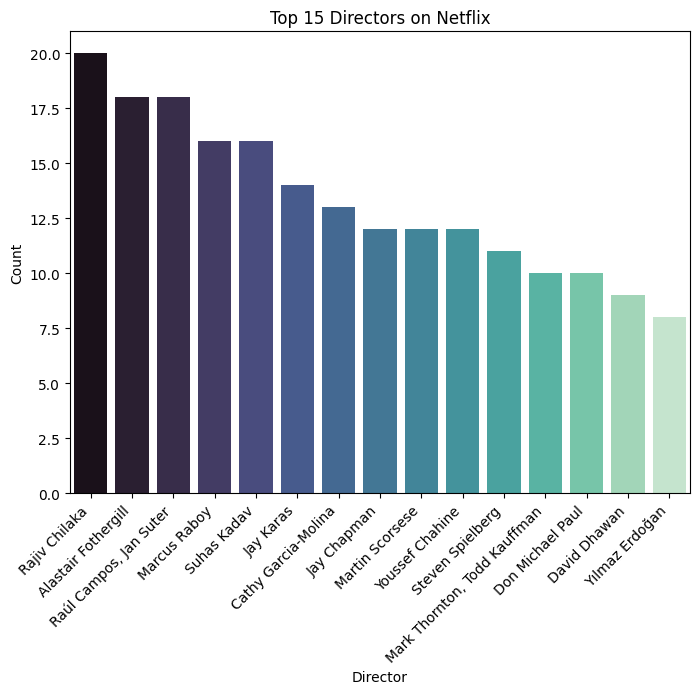

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=directors.index,y=directors.values,palette='mako',hue=directors.index)
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

In [ ]:
df.to_csv('netflix_cleaned.csv',index=False)

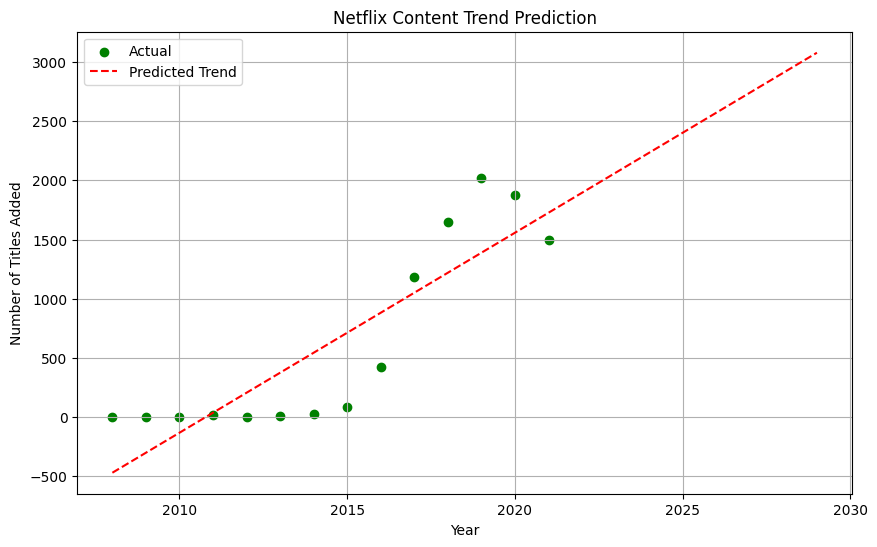

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract year from date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Count releases per year
yearly = df['year_added'].value_counts().sort_index().dropna()
X = np.array(yearly.index).reshape(-1, 1)
y = np.array(yearly.values)

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict future trend (next 5 years)
future_years = np.arange(yearly.index.min(), 2030).reshape(-1,1)
preds = model.predict(future_years)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='green', label='Actual')
plt.plot(future_years, preds, color='red', linestyle='--', label='Predicted Trend')
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Netflix Content Trend Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df = pd.read_csv("netflix_cleaned.csv")

# Use only 'listed_in' (genres/categories)
df['listed_in'] = df['listed_in'].fillna('')
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['listed_in'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend similar titles
def recommend(title, n=5):
    if title not in df['title'].values:
        return "Title not found in dataset."
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    recommended = [df.iloc[i[0]]['title'] for i in sim_scores]
    return recommended

# Example usage
print(recommend("Midnight Mass", 5))


['Brand New Cherry Flavor', 'The Haunting of Bly Manor', 'Ratched', 'The Haunting of Hill House', 'The Originals']
